# "Smuggler Problem"
> "A solution to a problem that begins 'Smugglers set off from a ship and move at constant speed v...'"

- toc:false
- branch: master
- badges: true
- comments: true
- author: Peter Sharp
- categories: [jupyter, mathematics]
- image: images/copied_from_nb/smuggler.png
- use_math: true

> Tip: Click "Launch Binder" above to open a functioning version of the notebook in [binder](https://mybinder.org) or "View in Github" to download to your own machine. Note the binder instance may take some time to load.

## Smugglers set off from a ship in a direction perpendicular to a straight shore and move at a constant speed *v*. The coastguard's cutter is a distance *a* along the shore from the smugglers' ship, and leaves the shore at the same time. The cutter always moves at a constant speed directly towards the smugglers' ship, and catches up with it at a distance *a* from the shore. How many times greater is the speed of the coastguard's cutter than the smugglers' ship?

![](smuggler.png)

In time $\Delta t$, the cutter moves away from the shore by $\Delta y$ and the displacement between the cutter and the smugglers reduces by $\Delta s$.

$$ \Delta y = v_c\sin{\theta}\Delta t $$

$$ \Delta s = (v_s\sin{\theta}-v_c)\Delta t $$

We know that at the point the cutter catches the smuggler
$$ \sum{\Delta y} = \sum{v_s \Delta t} = a $$
and
$$ \sum{\Delta s} = -a $$
(as all the $\Delta s$ values are negative and $s$ changes from $s=a$ to zero)

If $$ v_c = fv_s $$ then
$$ \sum{\Delta s} = \sum{v_s\sin{\theta}\Delta t} - \sum{v_c \Delta t} = -a \\
\implies \frac{1}{f}\sum{v_c\sin{\theta}\Delta t} - f\sum{v_s \Delta t} = -a \\
\implies \frac{1}{f}a - fa = -a \\
\implies f^2 - f - 1 = 0 $$

Solving gives:
$$ f = \frac{1\pm\sqrt{5}}{2} = 1.618 or -0.6180 $$

The negative solution has no physical meaning so is discarded and the answer is $f=1.618$.

## Checking in Python

We can check this in Python by modelling the motion until the cutter and smuggler come together. If the initial separation on the shore is 1, we expect them to come together a distance 1 from the shore. In this model, x is the position along the shore and y the position away from the shore.

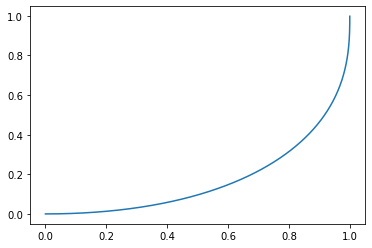

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def plot_motion(f=1.618):  # f = speed of cutter / speed of smuggler
    x,y = [0],[0] # position of cutter
    y_s = [0] # position of smuggler
    s = [1]
    dt = 0.001
    v = 1
    while s[-1]>0.001: # stop when cutter is within 0.1% of smuggler
        alpha = np.arctan((y_s[-1]-y[-1])/(1-x[-1]))
        dx = f*v*np.cos(alpha)*dt
        dy = f*v*np.sin(alpha)*dt
        dy_s = v*dt
        x.append(x[-1]+dx)
        y.append(y[-1]+dy)
        y_s.append(y_s[-1]+dy_s)
        s.append(((y_s[-1]-y[-1])**2+(1-x[-1])**2)**0.5)
    return x,y
x,y = plot_motion(1.618)
fig, ax = plt.subplots()
ax.plot(x,y)

Success! We can see what happens if the cutter is slower or faster below.

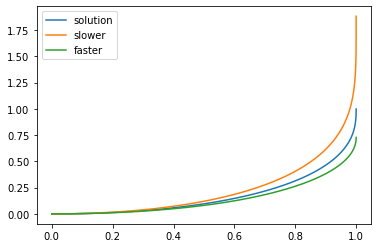

In [5]:
x1,y1 = plot_motion(1.3)
x2, y2 = plot_motion(1.9)
fig2, ax2 = plt.subplots()
ax2.plot(x,y,label='solution')
ax2.plot(x1,y1,label='slower')
ax2.plot(x2,y2, label='faster')
ax2.legend()